In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 경고 메시지가 뜨지 않게 설정
import warnings 
warnings.filterwarnings('ignore')

# 그래프 설정
# sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# matplotlib 설정
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 인코딩
from sklearn.preprocessing import LabelEncoder

# 검정
from scipy import stats

- 데이터 불러오기

In [2]:
check = pd.read_parquet('2018_회원정보.parquet')

In [3]:
df = pd.read_csv('병합_selected_features.csv')

In [4]:
# df[list(check.columns)]

In [5]:
drop_list = ['기준년월', '남녀구분코드', '연령', '회원여부_이용가능_카드론', '소지여부_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내',
 '수신거부여부_TM', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '거주시도명', '직장시도명',
 '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용_가족', '이용가능카드수_체크_가족', '이용카드수_신용체크',
 '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용_가족', '이용금액_R3M_체크_가족',
 '_1순위카드이용금액', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분', '최종유효년월_신용_이용가능',
 '최종유효년월_신용_이용', '최종카드발급일자', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인',
 '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M',
 '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', 
             '기타면제카드수_B0M', '카드신청건수', 'Life_Stage']

In [6]:
df = df[list(check.drop(drop_list, axis = 1).columns)]

In [7]:
df

,ID,Segment,회원여부_이용가능,회원여부_이용가능_CA,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,수신거부여부_DM,수신거부여부_메일,...,이용가능카드수_신용,이용가능카드수_체크,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_체크,_1순위카드이용건수,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용가능여부_해외겸용_신용_본인,최종카드발급경과월
0,TRAIN_000000,D,1,1,1,1,20130101,71,0,0,...,1,1,-454,-454,0,25,0,0,0,27
1,TRAIN_000001,E,1,1,1,1,20170801,16,0,0,...,1,0,7089,7089,0,31,0,0,0,23
2,TRAIN_000002,C,1,1,1,1,20080401,128,0,0,...,1,1,27336,27336,0,52,1,1,0,25
3,TRAIN_000003,D,1,1,2,2,20160501,31,0,0,...,2,1,4270,4270,0,27,1,1,1,22
4,TRAIN_000004,E,1,1,1,1,20180601,6,0,1,...,1,1,9385,7387,1997,-2,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,E,1,1,1,1,20010701,209,0,0,...,1,1,10755,7267,3488,3,1,1,1,39
399996,TRAIN_399996,D,1,1,1,1,20170701,17,0,0,...,1,0,27636,27636,0,38,1,1,1,24
399997,TRAIN_399997,C,1,1,1,1,20090501,115,1,1,...,1,0,23187,23187,0,33,1,1,1,18
399998,TRAIN_399998,E,1,1,1,1,20130101,71,1,1,...,1,0,0,0,0,-2,0,0,0,27


In [8]:
# Segment 인코딩
le = LabelEncoder()
target_ec = le.fit_transform(df['Segment'])

In [9]:
for idx, val in enumerate(df.columns) :
    print(f'{idx} : {val}')

0 : ID
1 : Segment
2 : 회원여부_이용가능
3 : 회원여부_이용가능_CA
4 : 소지카드수_유효_신용
5 : 소지카드수_이용가능_신용
6 : 입회일자_신용
7 : 입회경과개월수_신용
8 : 수신거부여부_DM
9 : 수신거부여부_메일
10 : 탈회횟수_발급1년이내
11 : 마케팅동의여부
12 : 유효카드수_신용체크
13 : 유효카드수_신용
14 : 유효카드수_신용_가족
15 : 이용가능카드수_신용
16 : 이용가능카드수_체크
17 : 이용금액_R3M_신용체크
18 : 이용금액_R3M_신용
19 : 이용금액_R3M_체크
20 : _1순위카드이용건수
21 : 보유여부_해외겸용_본인
22 : 이용가능여부_해외겸용_본인
23 : 이용가능여부_해외겸용_신용_본인
24 : 최종카드발급경과월


In [10]:
custom_palette = ['#0048FF', '#0037C3', '#2E69FF', '#0033B4', '#001F6F']

### 고객의 분류하는 기준이 되는 변수 찾기

#### 1.회원여부_이용가능
- 분실/연체/한도 소진 등의 이유로 블랙리스트로 등재되지 않은 회원인지 여부를 나타내는 데이터

In [71]:
# 블랙리스트 분포 확인
df['회원여부_이용가능'].value_counts(normalize = True)

회원여부_이용가능
1    0.946937
0    0.053062
Name: proportion, dtype: float64

In [72]:
# Segment별 블랙리스트 등재 고객 비율 확인
df.loc[df['회원여부_이용가능'] == 0, 'Segment'].value_counts(normalize = True)

Segment
E    0.961178
D    0.031048
C    0.007774
Name: proportion, dtype: float64

- Segment의 분포 비율은 불균형이 심하기 때문에 의미가 없다.

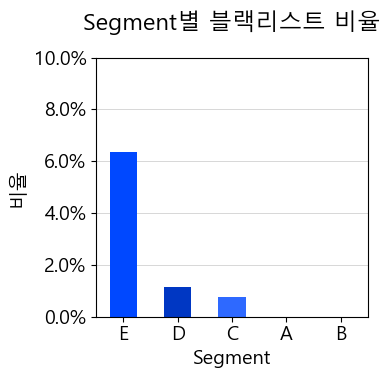

In [75]:
# 비율 계산: 각 Segment별 블랙리스트 비율

a1 = (
    df.loc[df['회원여부_이용가능'] == 0, 'Segment'].value_counts() /
    df['Segment'].value_counts()
).sort_values(ascending=False)

# bar plot
plt.figure(figsize = (4, 4))
a1.plot(kind='bar', color=custom_palette[:len(a1)])
plt.title('Segment별 블랙리스트 비율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)

plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 블랙리스트로 등재된 회원은 대부분 E 유형의 고객이다.
- A, B의 경우 한 명도 블랙리스트로 등재되지 않았다.

#### 2.회원여부_이용가능_CA
- 신용카드 현금 서비스 이용이 가능한 고객인지 여부를 확인하는 데이터

In [14]:
df['회원여부_이용가능_CA'].value_counts()

회원여부_이용가능_CA
1    348455
0     51545
Name: count, dtype: int64

In [16]:
# Segment별 현금 서비스 이용 불가능한 고객 비율
(df.loc[df['회원여부_이용가능_CA'] == 0, 'Segment'].value_counts() / df['Segment'].value_counts()).sort_values(ascending = False)

Segment
E    0.145338
D    0.064992
C    0.056478
B    0.041667
A    0.012346
Name: count, dtype: float64

- Segment 별 현금 서비스 이용이 불가능한 고객의 비율이 E에서 A로 갈수록 낮아지는 것을 볼 수 있다.

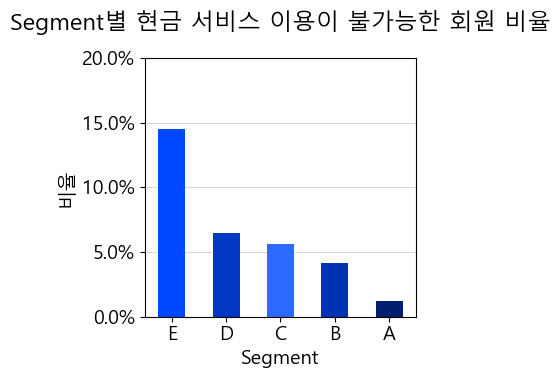

In [79]:
# 비율 계산: 각 Segment별 블랙리스트 비율

a1 = (
    df.loc[df['회원여부_이용가능_CA'] == 0, 'Segment'].value_counts() /
    df['Segment'].value_counts()
).sort_values(ascending=False)

# bar plot
plt.figure(figsize = (4, 4))
a1.plot(kind='bar', color=custom_palette[:len(a1)])
plt.title('Segment별 현금 서비스 이용이 불가능한 회원 비율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 0.2)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)

plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [80]:
df[['회원여부_이용가능', '회원여부_이용가능_CA']].corr()

,회원여부_이용가능,회원여부_이용가능_CA
회원여부_이용가능,1.000000,0.597704
회원여부_이용가능_CA,0.597704,1.000000


- Segment별 현금서비스 이용이 불가능한 회원의 비율 또한 A로 갈수록 낮아진다.

#### 3.소지카드수_유효_신용

In [18]:
df['소지카드수_유효_신용'].value_counts()

소지카드수_유효_신용
1    302723
2     65465
3     20961
0     10825
4        26
Name: count, dtype: int64

#### 4.소지카드수_이용가능_신용

In [19]:
df['소지카드수_이용가능_신용'].value_counts()

소지카드수_이용가능_신용
1    284318
2     61727
0     36984
3     16971
Name: count, dtype: int64

In [20]:
sum(df['소지카드수_유효_신용'] == df['소지카드수_이용가능_신용']) / df.shape[0]

0.908325

In [21]:
df[['소지카드수_이용가능_신용', '소지카드수_유효_신용']].corr()

,소지카드수_이용가능_신용,소지카드수_유효_신용
소지카드수_이용가능_신용,1.000000,0.873779
소지카드수_유효_신용,0.873779,1.000000


- 두 변수는 약 91% 정도가 일치한다.
- Pearson 상관계수로 두 변수 간의 관계를 확인한 결과 강한 상관관계를 가진다는 것을 알 수 있다.
- Segment와의 관계 확인 후 둘중 하나는 제거하도록 한다.

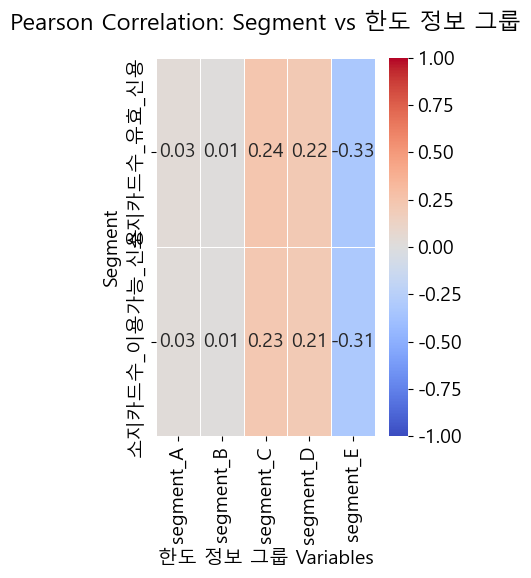

In [22]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = pd.DataFrame({
    '소지카드수_유효_신용' : df['소지카드수_유효_신용'],
    '소지카드수_이용가능_신용' : df['소지카드수_이용가능_신용']
})

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(4, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

- 소지카드수_유효_신용이 더 관계가 높기 때문에 해당 칼럼을 확인한다.

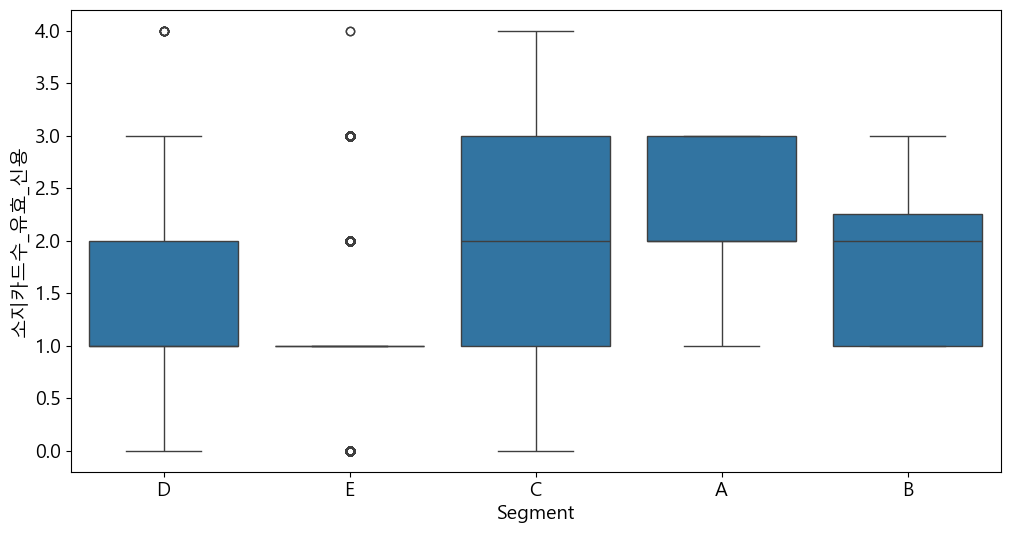

In [24]:
sns.boxplot(x = 'Segment', y = '소지카드수_유효_신용', data = df)
plt.show()

- Segment E 고객은 신용카드를 거의 한장만 보유한다.
- 반대로 Segment C와 A는  다양하게 2 ~ 3장 이상 보유 -> 활동성이 높은 유형일 가능성이 있다.

#### 5.입회일자_신용
- 카드 회원이 된 일자
- 입회일자에서 기준년월까지의 개월 수를 나타내는 입회경과개월수_신용 칼럼이 있기 때문에 해당 칼럼은 사용하지 않는다. 

#### 6. 입회경과개월수_신용

In [25]:
df['입회경과개월수_신용'].value_counts()

입회경과개월수_신용
6      52023
12      4211
11      4147
9       4101
16      4081
       ...  
325        3
331        1
327        1
337        1
328        1
Name: count, Length: 325, dtype: int64

In [26]:
print(df['입회경과개월수_신용'].min())
print(df['입회경과개월수_신용'].max())

6
337


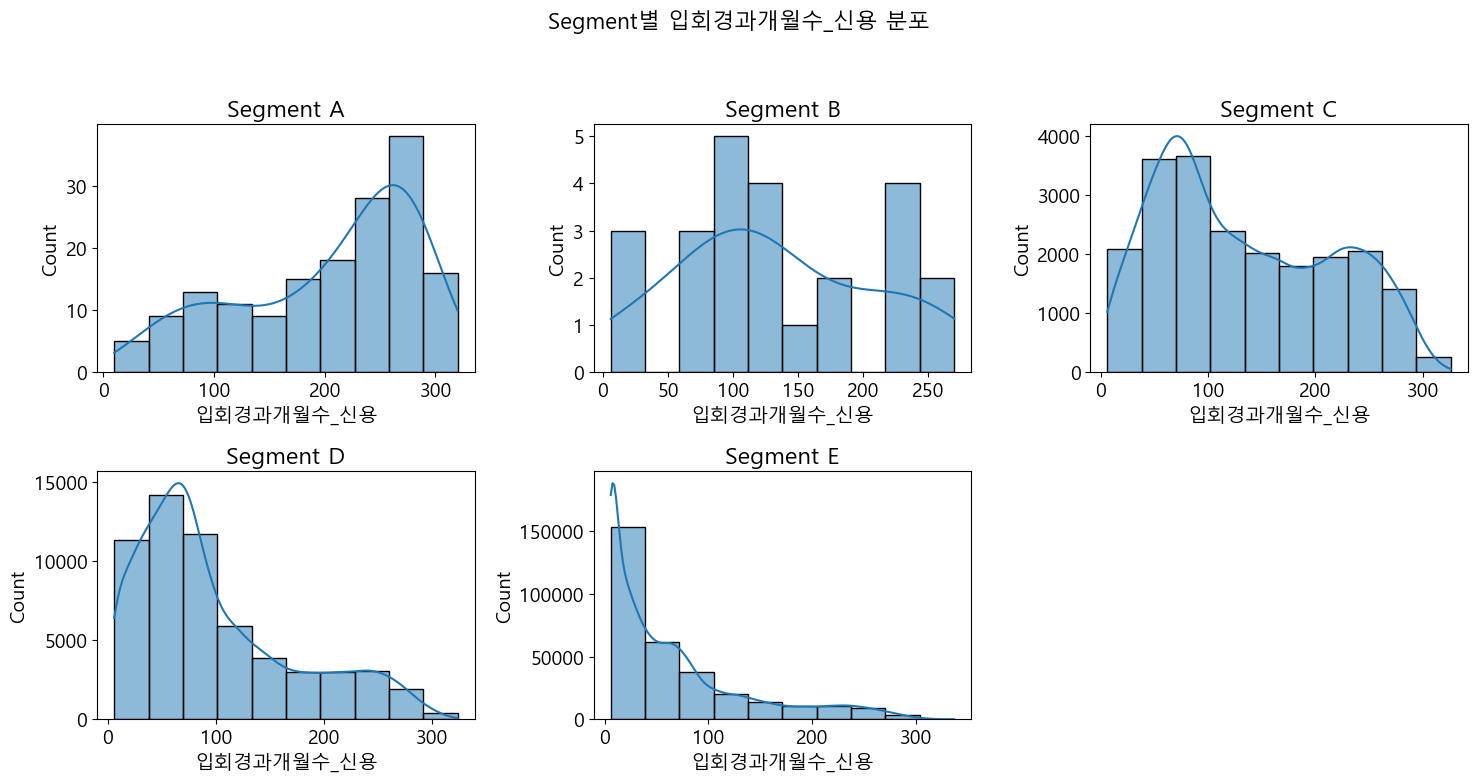

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 세그먼트 리스트
segments = ['A', 'B', 'C', 'D', 'E']

# subplot 설정 (2행 3열)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Segment별 입회경과개월수_신용 분포', fontsize=16)

# 세그먼트별 히스토그램 그리기
for i, segment in enumerate(segments):
    row, col = divmod(i, 3)
    data = df[df['Segment'] == segment]
    sns.histplot(data=data, x='입회경과개월수_신용', bins=10, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Segment {segment}')
    axs[row, col].set_xlabel('입회경과개월수_신용')
    axs[row, col].set_ylabel('Count')

# 마지막 subplot (2,3 중 빈칸) 제거
axs[1, 2].axis('off')

# 레이아웃 정리
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Segment E의 경우 25개월 이내 신규 가입한 고객의 비중이 매우 높다.
- C, D의 경우 주로 50 ~ 75개월 사이에 주로 분포를 이룬다.
- Segment B의 경우 100개월 경과 지점에 가장 큰 도수 값을 기록하지만 전체적으로 완만하고 꼬리가 두껍게 분포되어 있다. 
- A 분포는 회원 가입일이 250개월의 장기 가입 회원이 분포를 이루고 있다.

- 결론 : 회원가입 경과(개월수)가 길수록 Segment A에 가까워 진다.

#### 7. 수신거부여부_DM
- 카드사에서 보낸 DM의 수신을 거부 여부를 보여주는 데이터.

In [28]:
df['수신거부여부_DM'].value_counts(normalize = True)

수신거부여부_DM
0    0.680845
1    0.319155
Name: proportion, dtype: float64

In [29]:
df.loc[df['수신거부여부_DM'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

Segment
E    0.293920
D    0.412287
C    0.443358
A    0.456790
B    0.291667
Name: count, dtype: float64

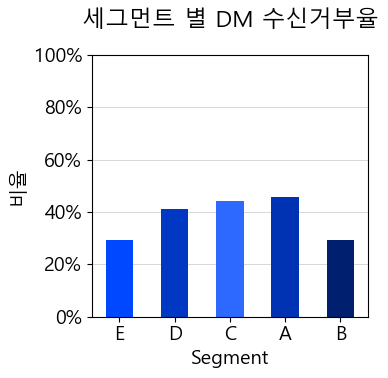

In [86]:
# 비율 계산
a1 = df.loc[df['수신거부여부_DM'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

# 두 번째 그래프
plt.figure(figsize = (4, 4))
a1.plot(kind='bar', color=custom_palette[:len(a1)])
plt.title('세그먼트 별 DM 수신거부율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)

plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 대체로 수신거부(DM) 비율이 30 ~ 40% 정도이다.
- 딱히 분석에 유의미한 차이는 없는 것으로 보인다.
- 수신거부(DM)율 자체는 A 고객이 가장 큰 것으로 보인다.

### 8.수신거부여부_메일
- 카드사에서 보내는 메일의 수신을 거부 여부를 나타내는 데이터

In [31]:
# 수신거부여부_메일의 분포를 확인한다.
df['수신거부여부_메일'].value_counts(normalize = True)

수신거부여부_메일
0    0.674913
1    0.325087
Name: proportion, dtype: float64

In [32]:
df.loc[df['수신거부여부_메일'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

Segment
E    0.299199
D    0.420997
C    0.451540
A    0.462963
B    0.291667
Name: count, dtype: float64

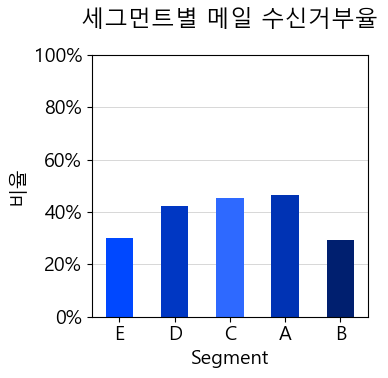

In [87]:
# 비율 계산
a1 = df.loc[df['수신거부여부_메일'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

# 두 번째 그래프
plt.figure(figsize = (4, 4))
a1.plot(kind='bar', color=custom_palette[:len(a1)])
plt.title('세그먼트별 메일 수신거부율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)

plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 수신거부여부_메일 칼럼과 수신거부여부_DM 칼럼의 분포가 이상하리만치 일치한다.
- 두 분포의 일치율을 확인해 본다.

In [34]:
sum(df['수신거부여부_메일'] == df['수신거부여부_DM']) / df.shape[0]

0.9894875

In [89]:
df[['수신거부여부_메일', '수신거부여부_DM']].corr()

,수신거부여부_메일,수신거부여부_DM
수신거부여부_메일,1.000000,0.976019
수신거부여부_DM,0.976019,1.000000


- 두 분포가 99%일치하는 칼럼이므로 다중공선성 문제를 가지고 있다.
- 둘 변수 중 Segment와의 상관계수가 낮은 하나의 칼럼을 제거한다.

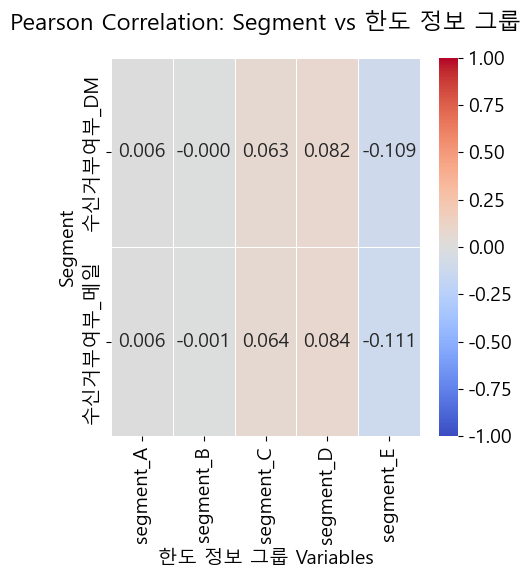

In [35]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = pd.DataFrame({
    '수신거부여부_DM' : df['수신거부여부_DM'],
    '수신거부여부_메일' : df['수신거부여부_메일']
})

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(5, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

- 두 변수는 Segment와의 상관계수가 소수점 2자리 까지 동일할 만큼 일치율이 높다.
- 3자리수 까지 확인 결과 수신거부여부_메일 칼럼이 미세하게 상관 계수가 높은 것으로 보인다.

#### 9.탈회횟수_발급1년이내
- 신용카드를 발급받고 1년 이내에 탈회한 수를 나타내는 데이터

In [36]:
# 탈회횟수_발급1년이내 분포 확인
print(df['탈회횟수_발급1년이내'].value_counts())
print()
print(df['탈회횟수_발급1년이내'].value_counts(normalize = True))

탈회횟수_발급1년이내
0    374676
1     25324
Name: count, dtype: int64

탈회횟수_발급1년이내
0    0.93669
1    0.06331
Name: proportion, dtype: float64


In [37]:
# 각 Segment별 탈회횟수를 확인한다.
df.loc[df['탈회횟수_발급1년이내'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

Segment
E    0.067069
D    0.050406
C    0.042464
A    0.006173
B    0.041667
Name: count, dtype: float64

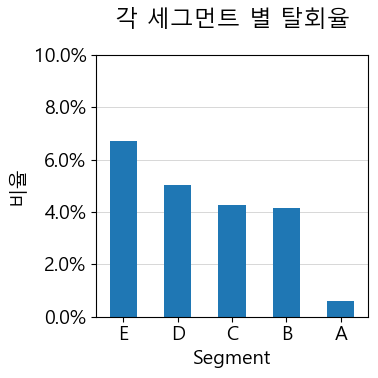

In [70]:
# 비율 계산: 각 세그먼트 내에서 메일 수신 거부 비율
a1 = (
    df.loc[df['탈회횟수_발급1년이내'] == 1, 'Segment'].value_counts() /
    df['Segment'].value_counts()
).sort_values(ascending=False)

# 단일 bar plot
plt.figure(figsize=(4, 4))
a1.plot(kind='bar')
plt.title('각 세그먼트 별 탈회율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # % 표시
plt.xticks(rotation=0)
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

- 탈퇴율이 E에서 A로 갈수록 낮아진다.

#### 10.마케팅동의여부

In [39]:
# 마케팅동의여부의 분포와 분포 비율 확인
print(df['마케팅동의여부'].value_counts())
print()
df['마케팅동의여부'].value_counts(normalize = True)

마케팅동의여부
1    323568
0     76432
Name: count, dtype: int64



마케팅동의여부
1    0.80892
0    0.19108
Name: proportion, dtype: float64

In [40]:
# 각 Segment 별 마케팅을 동의율
df.loc[df['마케팅동의여부'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()

Segment
E    0.818313
D    0.777175
C    0.754667
A    0.753086
B    0.875000
Name: count, dtype: float64

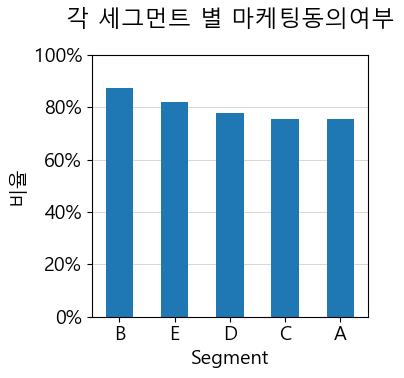

In [69]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 비율 계산: 각 세그먼트 내에서 메일 수신 거부 비율
a1 = (
    df.loc[df['마케팅동의여부'] == 1, 'Segment'].value_counts() /
    df['Segment'].value_counts()
).sort_values(ascending=False)

# 단일 bar plot
plt.figure(figsize=(4, 4))
a1.plot(kind='bar')
plt.title('각 세그먼트 별 마케팅동의여부', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # % 표시
plt.xticks(rotation=0)
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

- 의미있는 차이는 없는 것 같다.

#### 11.유효카드수_신용체크

In [90]:
df['유효카드수_신용체크'].value_counts()

유효카드수_신용체크
1    155299
2    112355
3     69400
4     34803
5     13961
0      7646
6      4769
7      1584
8       183
Name: count, dtype: int64

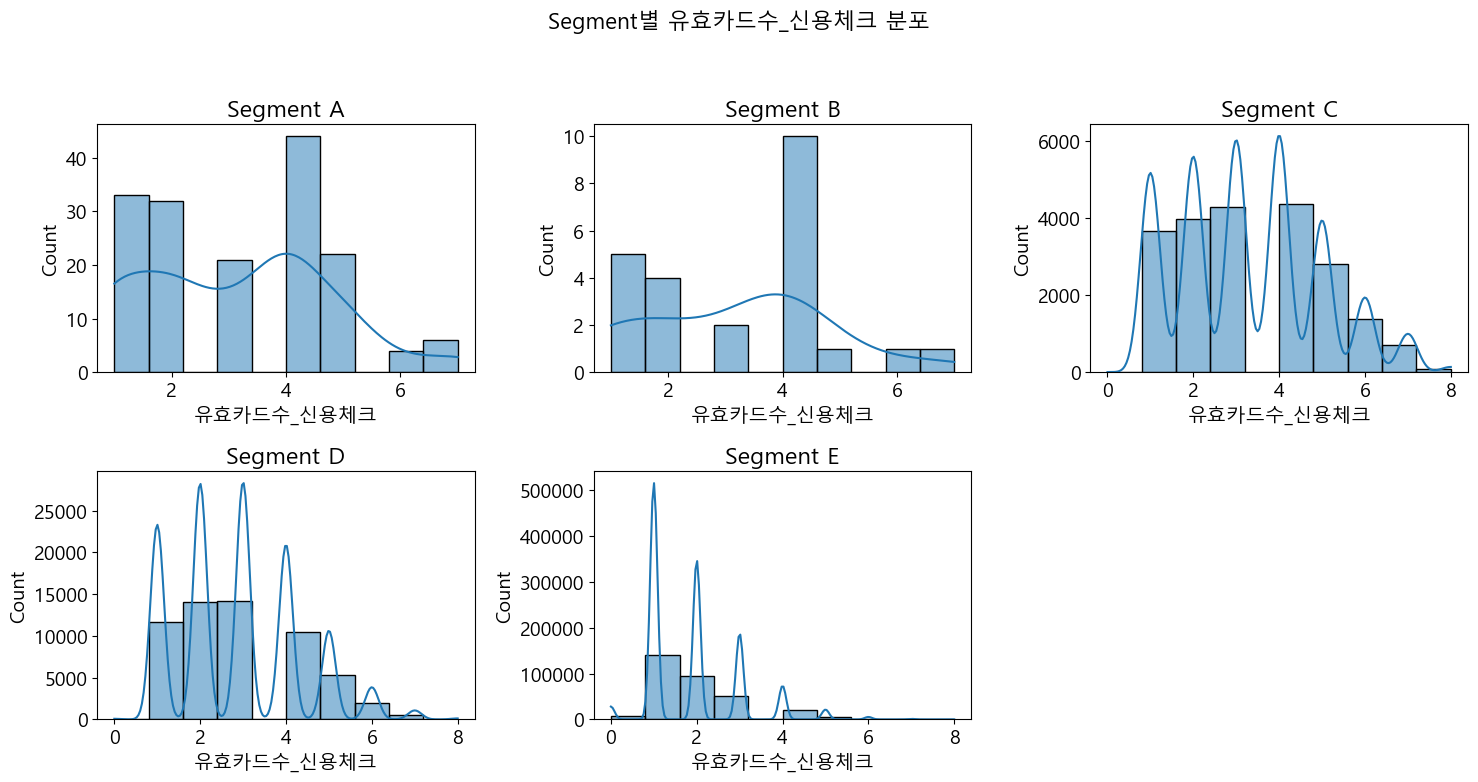

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 세그먼트 리스트
segments = ['A', 'B', 'C', 'D', 'E']

# subplot 설정 (2행 3열)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Segment별 유효카드수_신용체크 분포', fontsize=16)

# 세그먼트별 히스토그램 그리기
for i, segment in enumerate(segments):
    row, col = divmod(i, 3)
    data = df[df['Segment'] == segment]
    sns.histplot(data=data, x='유효카드수_신용체크', bins=10, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Segment {segment}')
    axs[row, col].set_xlabel('유효카드수_신용체크')
    axs[row, col].set_ylabel('Count')

# 마지막 subplot (2,3 중 빈칸) 제거
axs[1, 2].axis('off')

# 레이아웃 정리
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 12.유효카드수_신용

In [44]:
df['유효카드수_신용'].value_counts(normalize = True)

유효카드수_신용
1    0.618390
2    0.204240
3    0.099275
4    0.043725
0    0.026730
5    0.007640
Name: proportion, dtype: float64

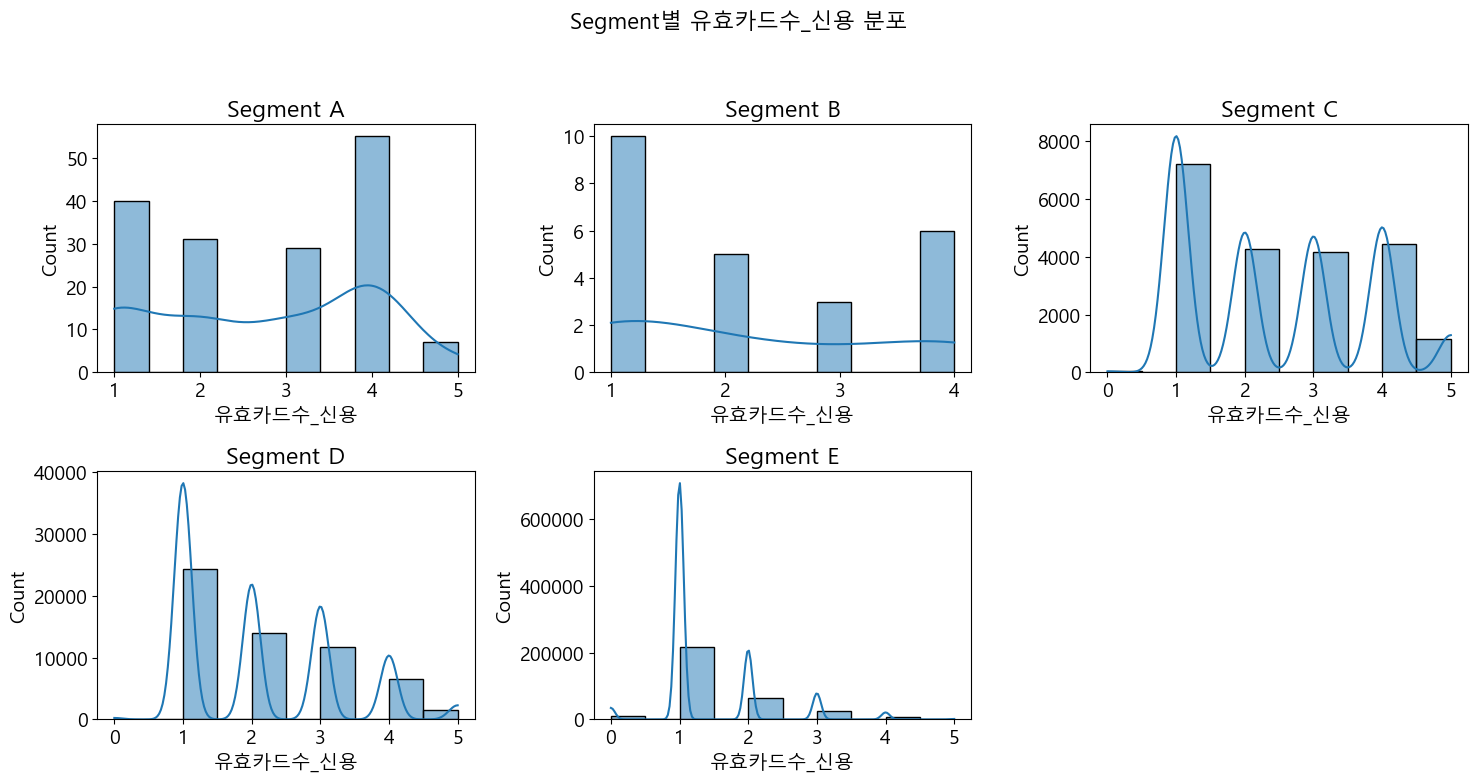

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 세그먼트 리스트
segments = ['A', 'B', 'C', 'D', 'E']

# subplot 설정 (2행 3열)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Segment별 유효카드수_신용 분포', fontsize=16)

# 세그먼트별 히스토그램 그리기
for i, segment in enumerate(segments):
    row, col = divmod(i, 3)
    data = df[df['Segment'] == segment]
    sns.histplot(data=data, x='유효카드수_신용', bins=10, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Segment {segment}')
    axs[row, col].set_xlabel('유효카드수_신용')
    axs[row, col].set_ylabel('Count')

# 마지막 subplot (2,3 중 빈칸) 제거
axs[1, 2].axis('off')

# 레이아웃 정리
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### _1순위카드이용건수

In [46]:
df.loc[df['_1순위카드이용건수'].isin([-2, -1]), '_1순위카드이용건수'] = 0
df['_1순위카드이용건수'].value_counts()

_1순위카드이용건수
0      100328
1       10890
2       10066
3        9371
4        8644
        ...  
218        20
219         9
220         5
222         2
221         1
Name: count, Length: 223, dtype: int64

In [47]:
E_df = df.loc[df['Segment'] == 'E']
DC_df = df.loc[df['Segment'].isin(['D', 'C'])]
AB_df = df.loc[df['Segment'].isin(['A', 'B'])]

In [48]:
df['Segment'].value_counts()

Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

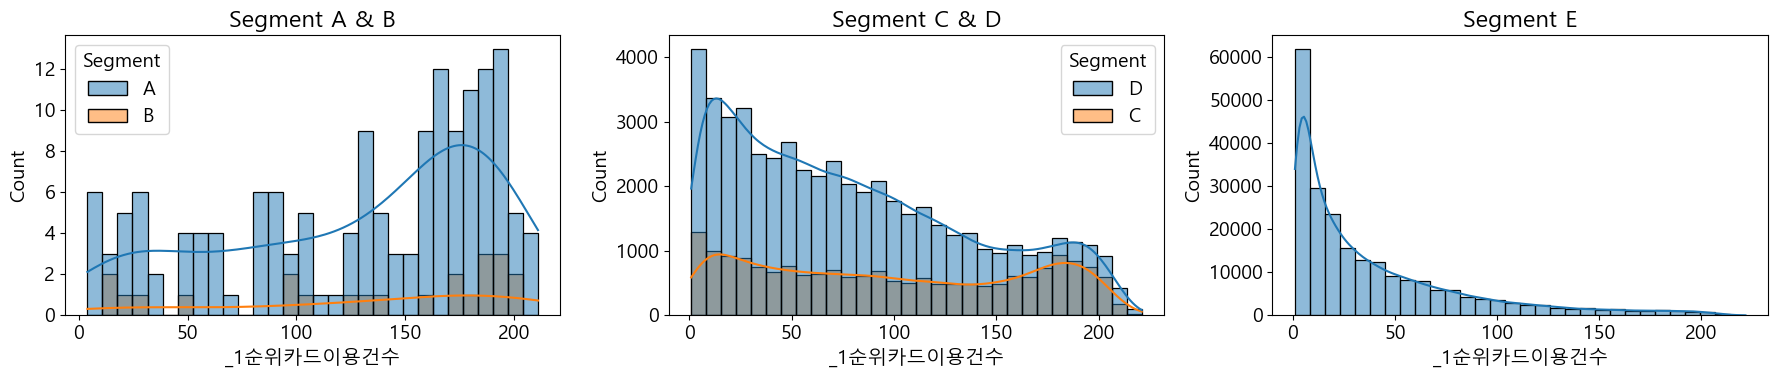

In [68]:
# 데이터 필터링
a1 = AB_df.loc[AB_df['_1순위카드이용건수'] != 0]
a2 = DC_df.loc[DC_df['_1순위카드이용건수'] != 0]
a3 = E_df.loc[E_df['_1순위카드이용건수'] != 0]

# 서브플롯 구성
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 1행 3열

# Segment A & B
sns.histplot(data=a1, x='_1순위카드이용건수', bins=30, kde=True, hue='Segment', ax=axes[0])
axes[0].set_title('Segment A & B')

# Segment C & D
sns.histplot(data=a2, x='_1순위카드이용건수', bins=30, kde=True, hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

# Segment E
sns.histplot(data=a3, x='_1순위카드이용건수', bins=30, kde=True, ax=axes[2])
axes[2].set_title('Segment E')

# 레이아웃 조정
plt.tight_layout()
plt.show()


- 대체로 A가 이용건수가 많은 것으로 확인된다.

#### 최종카드발급경과월

In [50]:
df['최종카드발급경과월'].value_counts()

최종카드발급경과월
5     14604
0     13231
16    12634
17    12482
14    12299
      ...  
62       53
63       21
64       16
65        3
67        1
Name: count, Length: 67, dtype: int64

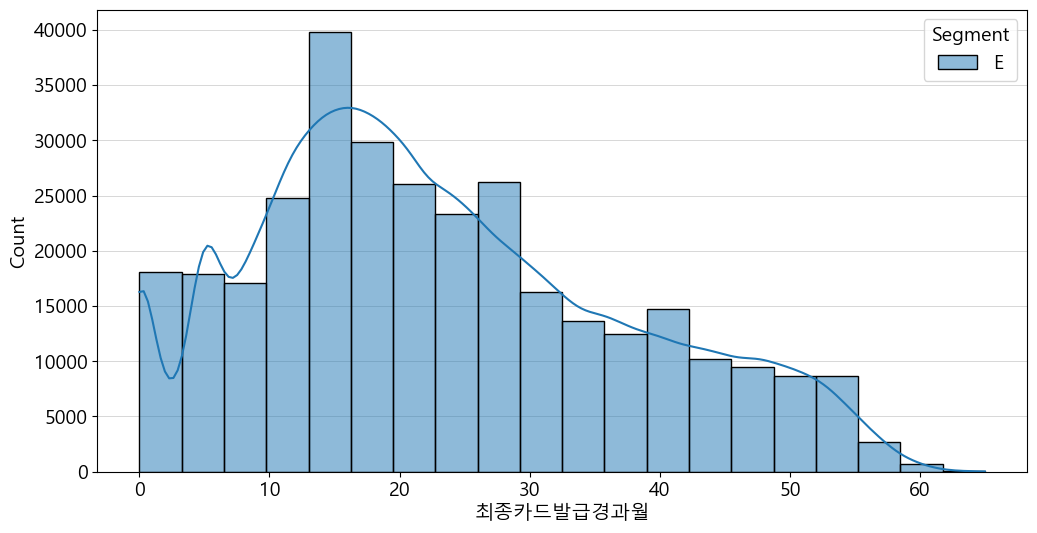

In [65]:
a1 = df.loc[df['Segment'] == 'E']
sns.histplot(data = a1, x = '최종카드발급경과월', bins = 20, kde = True, hue = 'Segment')
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

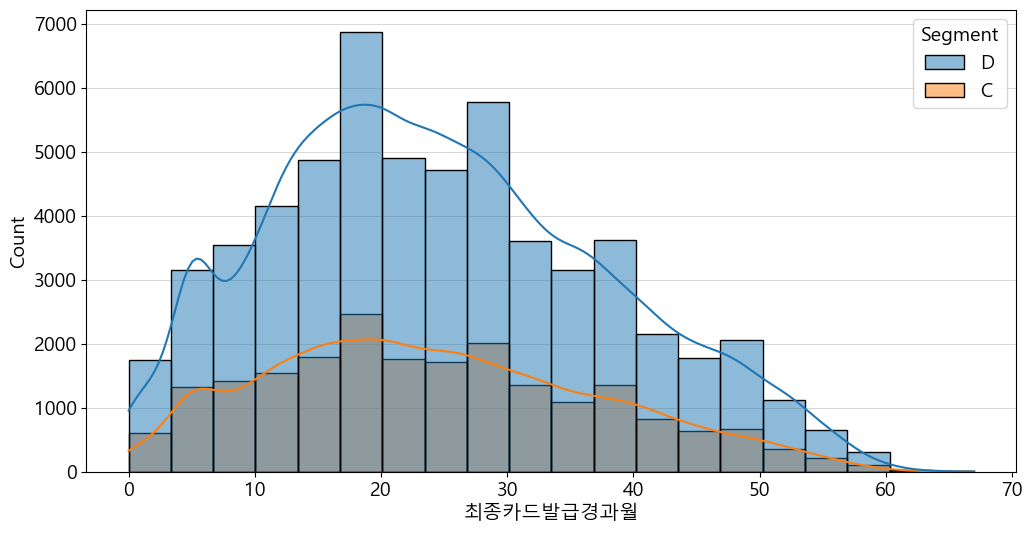

In [64]:
a1 = df.loc[df['Segment'].isin(['D', 'C'])]
sns.histplot(data = a1, x = '최종카드발급경과월', kde = True, bins = 20, hue = 'Segment')
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

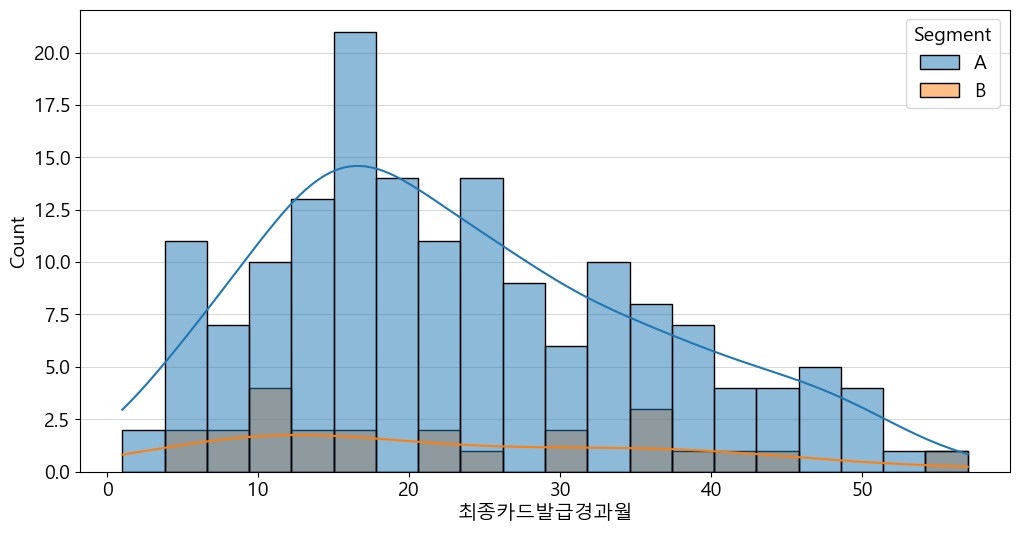

In [63]:
a1 = df.loc[df['Segment'].isin(['A', 'B'])]
sns.histplot(data = a1, x = '최종카드발급경과월', kde = True, bins = 20, hue = 'Segment')
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

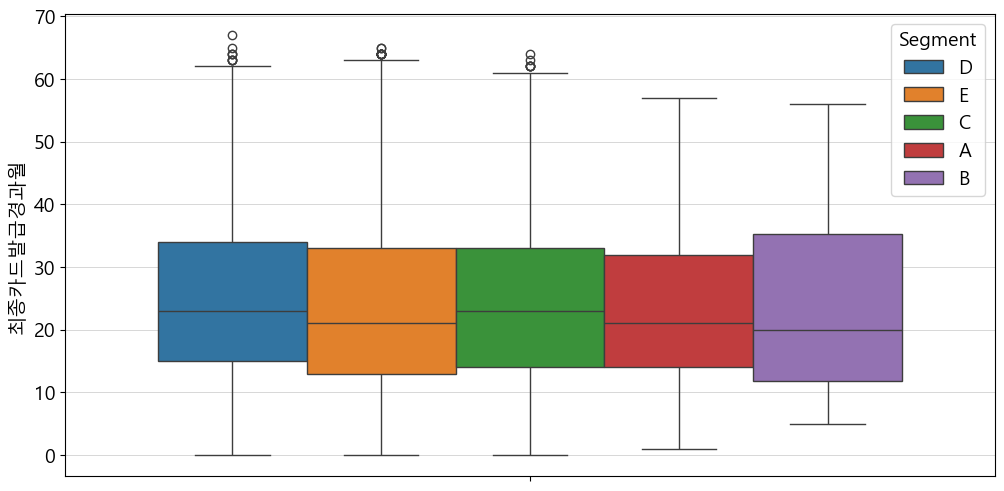

In [62]:
sns.boxplot(data = df, y = '최종카드발급경과월', hue = 'Segment')
plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

#### 보유여부_해외겸용_본인
- 카드 고객이 해외에서 사용 가능한 카드를 가지고 있는지 여부를 나타내는 데이터

In [55]:
df['보유여부_해외겸용_본인'].value_counts(normalize = True)

보유여부_해외겸용_본인
1    0.775077
0    0.224922
Name: proportion, dtype: float64

In [56]:
(df.loc[df['보유여부_해외겸용_본인'] == 1, 'Segment'].value_counts() / df['Segment'].value_counts()).sort_values(ascending = False)

Segment
A    0.987654
B    0.958333
C    0.934258
D    0.890219
E    0.743468
Name: count, dtype: float64

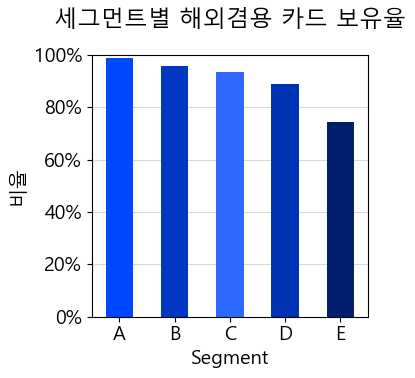

In [57]:
# 비율 계산: 각 세그먼트 내에서 메일 수신 거부 비율
a1 = (
    df.loc[df['보유여부_해외겸용_본인'] == 1, 'Segment'].value_counts() /
    df['Segment'].value_counts()
).sort_values(ascending=False)

# 단일 bar plot
plt.figure(figsize=(4, 4))
a1.plot(kind='bar', color=custom_palette[:len(a1)])
plt.title('세그먼트별 해외겸용 카드 보유율', pad=20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # % 표시
plt.xticks(rotation=0)

plt.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [58]:
for idx, val in enumerate(df.columns) :
    print(f'{idx} : {val}')

0 : ID
1 : Segment
2 : 회원여부_이용가능
3 : 회원여부_이용가능_CA
4 : 소지카드수_유효_신용
5 : 소지카드수_이용가능_신용
6 : 입회일자_신용
7 : 입회경과개월수_신용
8 : 수신거부여부_DM
9 : 수신거부여부_메일
10 : 탈회횟수_발급1년이내
11 : 마케팅동의여부
12 : 유효카드수_신용체크
13 : 유효카드수_신용
14 : 유효카드수_신용_가족
15 : 이용가능카드수_신용
16 : 이용가능카드수_체크
17 : 이용금액_R3M_신용체크
18 : 이용금액_R3M_신용
19 : 이용금액_R3M_체크
20 : _1순위카드이용건수
21 : 보유여부_해외겸용_본인
22 : 이용가능여부_해외겸용_본인
23 : 이용가능여부_해외겸용_신용_본인
24 : 최종카드발급경과월
